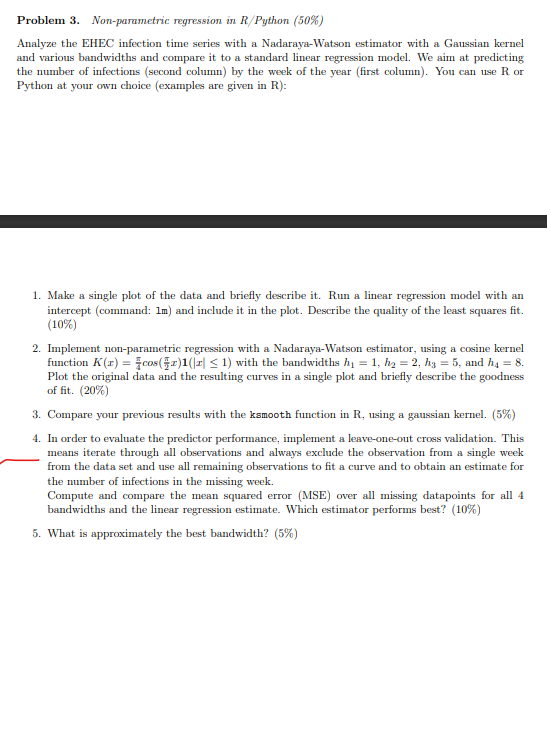

# Problem 3.1.

In [58]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import scipy.stats

In [2]:
data = pd.read_csv("C:/Users/Qba Liu/Documents/STUDIA/BIOINF_MASTER_BERLIN/SEMESTER_I/FOUNDATIONS_IN_MATH_AND_STATISTICS/LAB/Ehec2014.csv", delimiter = ";", header = None)

In [3]:
data = data.rename(columns={0: 'week', 1: 'infections'})
data.head()

,week,infections
0,1,14
1,2,29
2,3,24
3,4,42
4,5,34


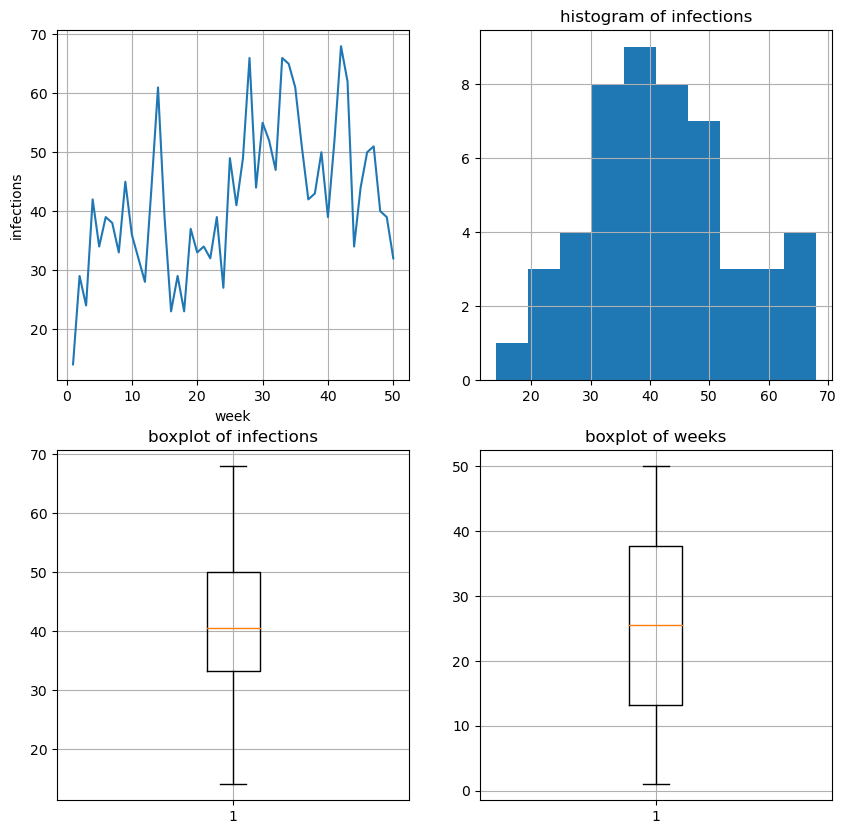

In [4]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(data['week'], data['infections'])
plt.xlabel('week')
plt.ylabel('infections')
plt.grid()

plt.subplot(2,2,2)
plt.hist(data['infections'])
plt.title('histogram of infections')
plt.grid()

plt.subplot(2,2,3)
plt.boxplot(data['infections'])
plt.title('boxplot of infections')
plt.grid()

plt.subplot(2,2,4)
plt.boxplot(data['week'])
plt.title('boxplot of weeks')
plt.grid()
plt.show()

The infections variable seems to be normally distributed, with a median of 40. The week variable doesn't show any abnormalities.

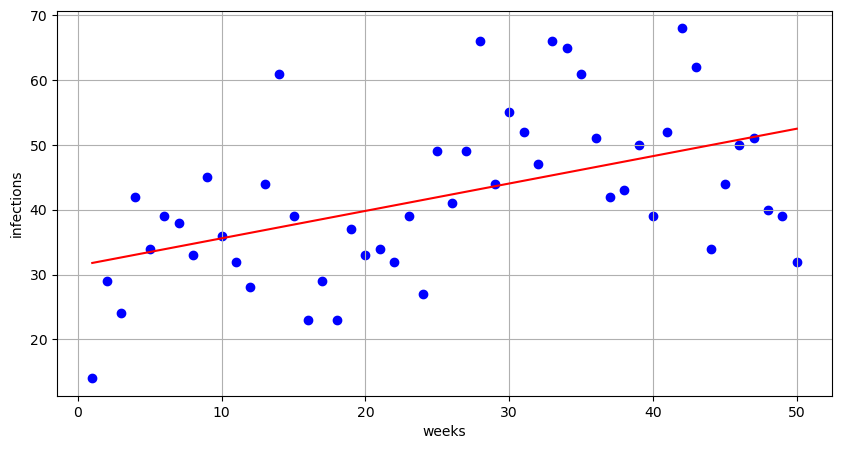

In [5]:
X = np.array(data['week']).reshape((-1, 1))
y = np.array(data['infections'])

model_lm = LinearRegression()
model_lm.fit(X,y)

plt.figure(figsize = (10,5))
plt.scatter(X, y,color='blue')
plt.plot(X, model_lm.predict(X),color='red')
plt.grid()
plt.xlabel('weeks')
plt.ylabel('infections')

plt.show()

# Problem 3.2.

In [6]:
def Kernel_cosine(u):
    
    pi = 3.141592653589793
    
    if abs(u) <= 1:
        return (pi/4)*math.cos((pi/2)*u)
    else:
        return 0

In [12]:
# to test on the tutorial data
def Kernel_epa(u):
    
    pi = 3.141592653589793
    
    if abs(u) <= 1:
        return 0.75*(1-u**2)
    else:
        return 0

In [87]:
# 9 --> week
# weight --> infections

def NW_est(x,X,Y,h,kernel):
    # Y --> the variable Y (weight)
    # X --> the variable X (age)
    # x --> our given age (9)
    # h --> bandwidth
    # kernel --> kernel function
    
    numerator = 0
    denominator = 0
    
    for i in range(1, len(Y)):
        numerator = numerator + kernel((x-X[i])/h) * Y[i]
        denominator = denominator + kernel((x-X[i])/h)
    
    # evade zero division error
    if denominator == 0.00:
        denominator = denominator + 0.00000001

    res = numerator/denominator
    
    return res

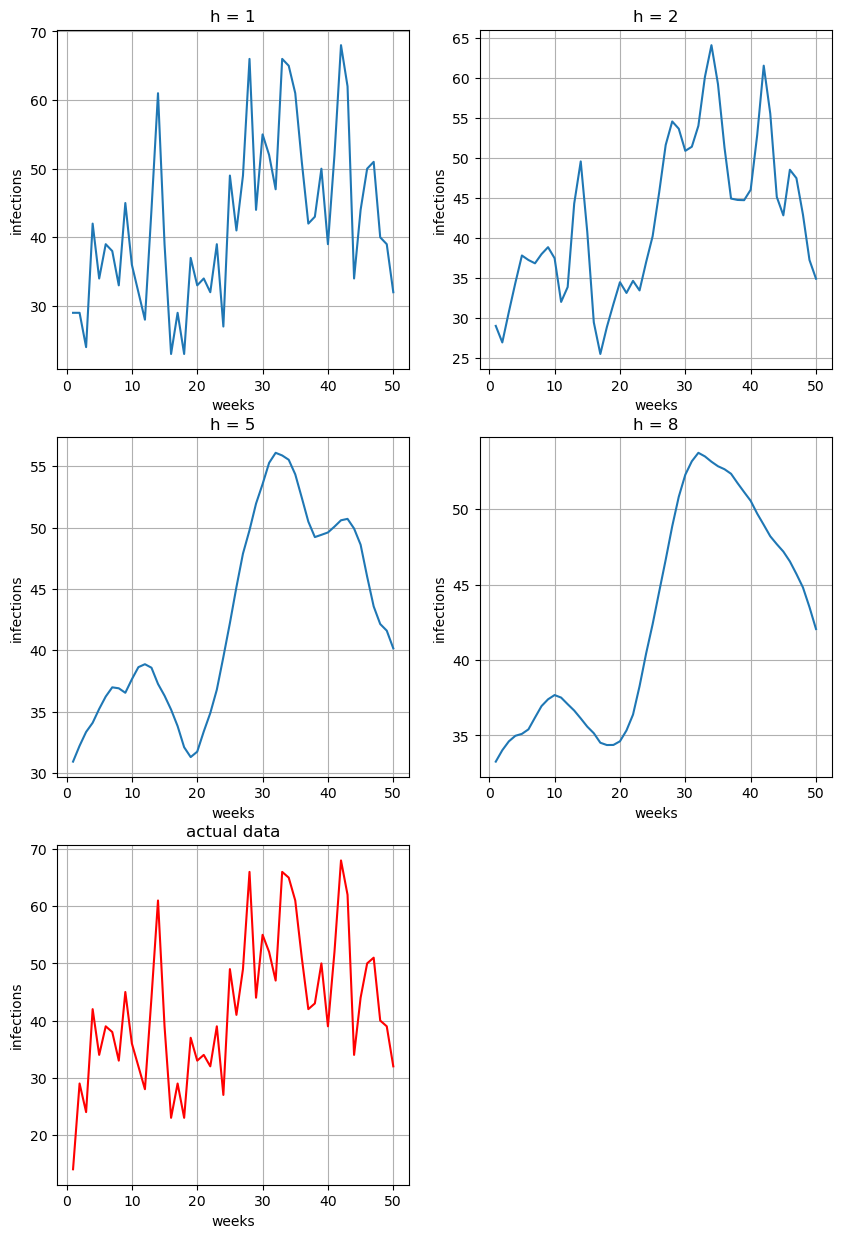

In [98]:
weeks_actual = data['week'].to_list()
infections = data['infections'].to_list()
infections_estimates_h1 = []
infections_estimates_h2 = []
infections_estimates_h3 = []
infections_estimates_h4 = []

seq = np.linspace(min(weeks_actual), max(weeks_actual), 1000)

for i in weeks_actual:
    est = NW_est(x = i, X = weeks_actual, Y = infections, h = 1, kernel = Kernel_cosine)
    infections_estimates_h1.append(est)

for i in weeks_actual:
    est = NW_est(x = i, X = weeks_actual, Y = infections, h = 2, kernel = Kernel_cosine)
    infections_estimates_h2.append(est)
    
for i in weeks_actual:
    est = NW_est(x = i, X = weeks_actual, Y = infections, h = 5, kernel = Kernel_cosine)
    infections_estimates_h3.append(est)
    
for i in weeks_actual:
    est = NW_est(x = i, X = weeks_actual, Y = infections, h = 8, kernel = Kernel_cosine)
    infections_estimates_h4.append(est)

plt.figure(figsize = (10,15))

plt.subplot(3,2,1)
plt.plot(weeks_actual, infections_estimates_h1)
plt.xlabel('weeks')
plt.ylabel('infections')
plt.title('h = 1')
plt.grid()

plt.subplot(3,2,2)
plt.plot(weeks_actual, infections_estimates_h2)
plt.xlabel('weeks')
plt.ylabel('infections')
plt.title('h = 2')
plt.grid()

plt.subplot(3,2,3)
plt.plot(weeks_actual, infections_estimates_h3)
plt.xlabel('weeks')
plt.ylabel('infections')
plt.title('h = 5')
plt.grid()

plt.subplot(3,2,4)
plt.plot(weeks_actual, infections_estimates_h4)
plt.xlabel('weeks')
plt.ylabel('infections')
plt.title('h = 8')
plt.grid()

plt.subplot(3,2,5)
plt.plot(data['week'], data['infections'], color = 'red')
plt.xlabel('weeks')
plt.ylabel('infections')
plt.title('actual data')
plt.grid()

plt.show()


# Problem 3.3.

### nope stupid

# Problem 3.4

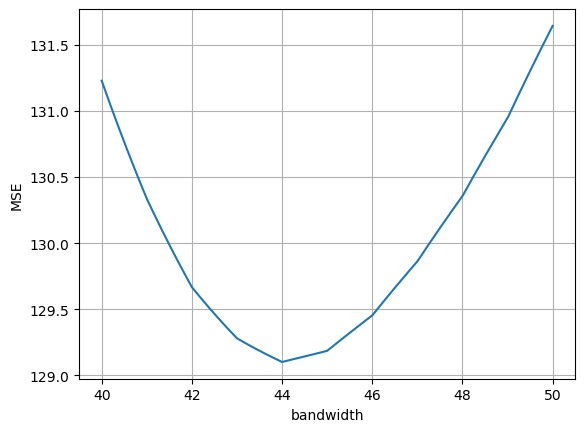

In [136]:
# leave one out cross-validation

num_rec = data.shape[0]
bands = []

for i in np.linspace(40,50,1000):
    bands.append(i)

errors = []
    
for band in bands:
    MSE = 0
    for i in range(0, num_rec):
        actual = data.iloc[i,1]   # actual infection value
        data_small = data.drop(i, axis = 0) # dataset after leaving out one record
        estimate = NW_est(x = data.iloc[i,1], X = data_small['week'].tolist(), Y = data_small['infections'].tolist(), h = band, kernel = Kernel_cosine)
        MSE = MSE + (actual - estimate)**2

    MSE = MSE/num_rec
    errors.append(MSE)

plt.plot(bands, errors)
plt.xlabel('bandwidth')
plt.ylabel('MSE')
plt.grid()
plt.show()
    
    